In [1]:
import os
import sys
import time
import random
import yaml
import warnings

import darkfield
from darkfield import mmmUtils as mu
from darkfield import rossendorfer_farbenliste as rofl
from darkfield import diffra as df

import numpy as np
from bash_config import write_bash
from darkfield.A14_mod import HOME 

from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.colors import LogNorm
from importlib import reload

In [2]:
#pip freeze | grep numpy

In [6]:
proj='/home/yu79deg/darkfield_p5438/Aime'
#yaml='5438_N6000'
#yaml='5438_1_N8000_02-05-2025_13-54'
# yaml='5438_1_N8000_12-05-2025_13-27'
#yaml='5438_serratedA1_N8000_16-05-2025_12-46'
yaml='5438_serratedA1_N0500_23-05-2025_16-44'

In [7]:
fn=os.path.join(proj,'pickles',yaml+'_figs.pickle')
print(fn)
figs=mu.loadPickle(fn)
print(list(figs.keys()))

/home/yu79deg/darkfield_p5438/Aime/pickles/5438_serratedA1_N0500_23-05-2025_16-44_figs.pickle
['CRL1', 'PH', 'TCC', 'A1-', 'A1', 'Det']


In [8]:
# fn_1=os.path.join(proj,'pickles',yaml_1+'_figs.pickle')
# print(fn_1)
# figs_1=mu.loadPickle(fn_1)
# print(list(figs_1.keys()))

In [9]:
plt.rc('font',   size     =30)          # controls default text sizes
plt.rc('axes',   titlesize=30)  # fontsize of the axes title
plt.rc('axes',   labelsize=30)          # fontsize of the x and y labels
plt.rc('xtick',  labelsize=28) # fontsize of the tick labels
plt.rc('ytick',  labelsize=28) # fontsize of the tick labels
plt.rc('legend', fontsize =16)          # legend fontsize

Det


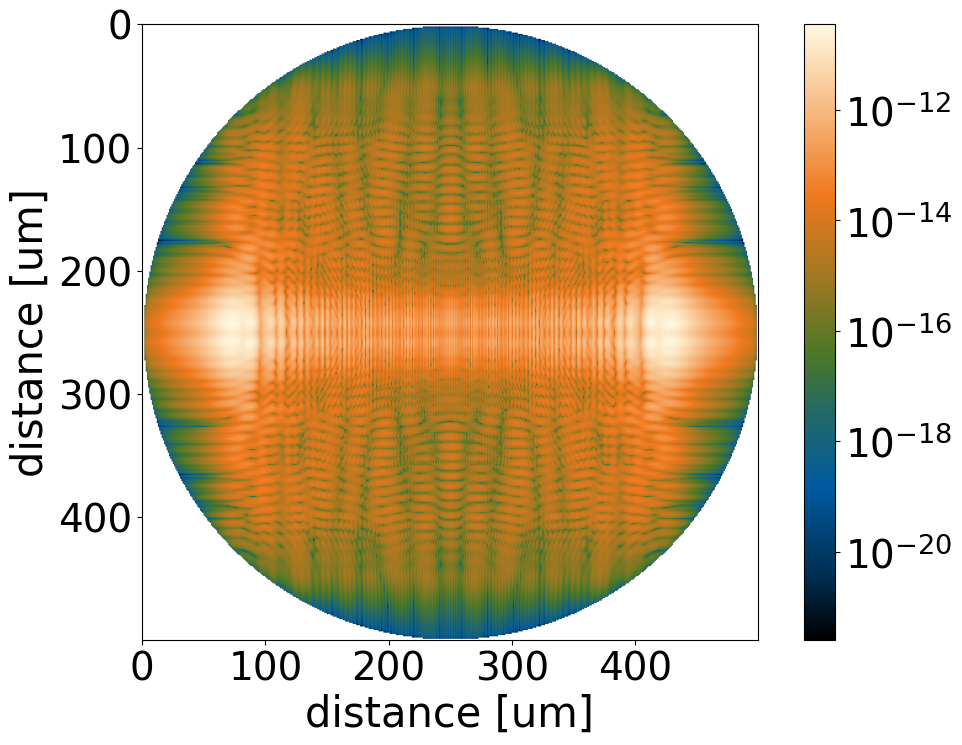

In [10]:
for fig in figs.keys():
    if fig!='Det': continue
    print(fig)
    mu.figure()
    img=figs[fig][0]
    ps=figs[fig][2]
    ps2=ps*1e6
    ps2=ps*1e6//2
    ex=(-ps2,ps2,-ps2,ps2)
    img = img*ps**2
    side = 50
    L,H = img.shape
    rect_dim = [L//2, L//2, H//2, H//2]
    plt.imshow(img,cmap=rofl.cmap(),norm=LogNorm()) #[135:165,135:165][700:800,600:900] (),extent=ex
    jf_px = [-38.5,38.5,-38.5,38.5]
    ik_px = [-6.75,6.75,-6.75,6.75]
    #mu.drawRect(jf_px,color='r',lw=2)
    #mu.drawRect(ik_px,color='green',lw=3)
    #plt.text(-38,36,'total singal = str()', color='w', size=10)
    #plt.title(yaml+'   '+ fig)
    plt.ylabel('distance [um]')
    # plt.xticks(np.linspace(-55,55,7))
    # plt.yticks(np.linspace(-55,55,7))
    plt.xlabel('distance [um]')
    plt.colorbar()
    #plt.clim(0.5,1)
    # plt.gca().xaxis.set_major_locator(plt.NullLocator())
    # plt.gca().yaxis.set_major_locator(plt.NullLocator())
    #plt.savefig('/home/qo38soh/darkfield_p5438/notebooks/serrated_A1/A1_Zoom_1amp_5lam.png',  bbox_inches = 'tight')
    plt.show()
    
    #print("{:.1e}".format(np.sum(img)*ps**2))

In [14]:
L,H = img.shape
print(L,H)

1000 1000


In [ ]:
np.argwhere(img[750,750]==img.max())

In [ ]:
ps

In [ ]:
ps2=figs[fig][2]*1e6/2
print("{:.1e}".format(np.sum(img)*ps2**2))

In [ ]:
img.max()

In [ ]:
ic=img[48:252,48:252]
print(np.sum(ic)*ps**2)

In [ ]:
a

In [ ]:
for fig in figs_1.keys():
    if fig!='A1': continue
    print(fig)
    mu.figure()
    img_1=figs[fig][0]
    ps2=figs[fig][2]*1e6/2
    ex=(-ps2,ps2,-ps2,ps2)
    plt.imshow(img_1,cmap=rofl.cmap(), norm=LogNorm())#,extent=ex)#, norm=LogNorm())
    L,H = img_1.shape
    side = 10
    rect_dim = [L//2-side, L//2+side, H//2-side, H//2+side]
    mu.drawRect(rect_dim)
    plt.title(yaml+'   '+ fig)
    plt.colorbar()
    ps3=ps2
    #mu.savefig(os.path.join(proj,'images',yaml+f'_{fig}.png'))
    plt.clim(0.01,0.35)
    plt.show()
    print("{:.1e}".format(np.sum(img_1)))

In [ ]:
np.argwhere(img_1==img_1.max())

In [ ]:
a/np.sum(img_1)

In [ ]:
plt.plot(img[:,150])
#plt.yscale('log')

In [ ]:
prof=np.nansum(img,0)
plt.semilogy(prof)
plt.show()

print(np.sum(img))